<a href="https://colab.research.google.com/github/nitrogenlab/gp15wmascripts/blob/main/notebooks/Replicating_pyompa_base_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install pyompa
!pip uninstall -y pyompa
%cd /content/
!rm -rf pyompa
!git clone https://github.com/nitrogenlab/pyompa
%cd /content/pyompa
!git checkout dev
!git log -1
!pip install .
%cd /content/


%reload_ext autoreload
%autoreload 2
from importlib import reload
import pyompa
reload(pyompa)

/content
Cloning into 'pyompa'...
remote: Enumerating objects: 1335, done.
remote: Counting objects: 100% (643/643), done.
remote: Compressing objects: 100% (430/430), done.
remote: Total 1335 (delta 456), reused 375 (delta 210), pack-reused 692
Receiving objects: 100% (1335/1335), 14.93 MiB | 12.08 MiB/s, done.
Resolving deltas: 100% (942/942), done.
/content/pyompa
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'
commit 4684d1fcae3c0851d0cd56e189e63ae05946bbc3 (HEAD -> dev, tag: v0.4.1.0, origin/dev)
Merge: a689c6b 55d4682
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Fri Jan 28 16:49:38 2022 -0700

    Merge pull request #6 from nitrogenlab/devsmallchanges
    
    Adding GeneralPenaltyFunc
Processing /content/pyompa
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this

<module 'pyompa' from '/usr/local/lib/python3.7/dist-packages/pyompa/__init__.py'>

In [2]:
#Install gp15wmascripts
!pip uninstall -y gp15wma
%cd /content/
!rm -rf gp15wmascripts
!git clone https://github.com/nitrogenlab/gp15wmascripts
%cd /content/gp15wmascripts
!git checkout main
!git log -1
!pip install .
%cd /content/

%reload_ext autoreload
%autoreload 2
from importlib import reload
import gp15wma
reload(gp15wma)

/content
Cloning into 'gp15wmascripts'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 120 (delta 63), reused 66 (delta 26), pack-reused 0
Receiving objects: 100% (120/120), 2.20 MiB | 7.07 MiB/s, done.
Resolving deltas: 100% (63/63), done.
/content/gp15wmascripts
Already on 'main'
Your branch is up to date with 'origin/main'.
commit d5b0ce21dfc7177b757e123b225a8f0e9877fa26 (HEAD -> main, origin/main, origin/HEAD)
Author: rml54 <45828236+rml54@users.noreply.github.com>
Date:   Fri Jan 28 14:59:53 2022 -0700

    needs bug fix
Processing /content/gp15wmascripts
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find d

<module 'gp15wma' from '/usr/local/lib/python3.7/dist-packages/gp15wma/__init__.py'>

In [3]:
gp15_df, gp15_intermediateanddeep, gp15_thermocline = gp15wma.download_and_load_gp15_data(
    station_to_tc_cutoffs_url="https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/station_to_tc_cutoffs.json")

bottle flag BTLNBR_FLAG_W BTLNBR_FLAG_W
uint8
leg1 nans 0
leg2 nans 0
CTD salinity flag CTDSAL_FLAG_W CTDSAL_FLAG_W
uint8
leg1 nans 0
leg2 nans 0
bottle oxygen flag Flag_OXYGEN_D_CONC_BOTTLE_qizf9x Flag_OXYGEN_D_CONC_BOTTLE_n41f8b
uint8
leg1 nans 0
leg2 nans 0
silicate flag Flag_SILICATE_D_CONC_BOTTLE_l9fh07 Flag_SILICATE_D_CONC_BOTTLE_3fot83
uint8
leg1 nans 0
leg2 nans 0
nitrate flag Flag_NITRATE_D_CONC_BOTTLE_xhgtuv Flag_NITRATE_D_CONC_BOTTLE_bugat8
uint8
leg1 nans 0
leg2 nans 0
phosphate flag Flag_PHOSPHATE_D_CONC_BOTTLE_lof4ap Flag_PHOSPHATE_D_CONC_BOTTLE_d0rgav
uint8
leg1 nans 0
leg2 nans 0
CTD pressure CTDPRS CTDPRS
float64
leg1 nans 487
leg2 nans 492
CTD temperature CTDTMP CTDTMP
float64
leg1 nans 487
leg2 nans 492
practical_salinity CTDSAL CTDSAL
float64
leg1 nans 487
leg2 nans 492
lat LATITUDE LATITUDE
float64
leg1 nans 476
leg2 nans 484
lon LONGITUDE LONGITUDE
float64
leg1 nans 476
leg2 nans 484
stnnbr STNNBR STNNBR
<U12
leg1 and leg2 arrays are strings.
geotrc_ID GEOTRC_SAMP

In [4]:
interanddeep_endmember_df = gp15wma.load_interanddeep_endmember_df(
    df_url="https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/GP15_mode_waters_intermediateanddeep_endmemberswithsubtypes.csv",
    df_file_name="GP15_intermediateanddeep.csv")


In [5]:
base_soln = gp15wma.get_pyompa_soln(
    obs_df=gp15_intermediateanddeep, endmember_df_touse=interanddeep_endmember_df)

param_names is None; using defaults:
['conservative_temp', 'absolute_salinity', 'silicate', 'nitrate', 'phosphate', 'oxygen']
param_weightings is None; using defaults:
{'conservative_temp': 56.0, 'absolute_salinity': 80.0, 'silicate': 3.0, 'nitrate': 5.0, 'phosphate': 5.0, 'oxygen': 1.0, 'NO': 1.0, 'PO': 0.5}
convertedparam_groups is None; using defaults
usagepenalty is None; using defaults
{'ENPCW_*': <pyompa.endmemberpenaltyfunc.GeneralPenaltyFunc object at 0x7fa422fe8dd0>, 'SPCW_*': <pyompa.endmemberpenaltyfunc.GeneralPenaltyFunc object at 0x7fa422fec110>, 'PSUW_*': <pyompa.endmemberpenaltyfunc.GeneralPenaltyFunc object at 0x7fa422fec410>, 'ESSW_*': <pyompa.endmemberpenaltyfunc.GeneralPenaltyFunc object at 0x7fa422fec5d0>, 'EqIW_*': <pyompa.endmemberpenaltyfunc.GeneralPenaltyFunc object at 0x7fa422fec8d0>, 'LCDW_*': <pyompa.endmemberpenaltyfunc.GeneralPenaltyFunc object at 0x7fa422fecbd0>, 'AAIW_*': <pyompa.endmemberpenaltyfunc.GeneralPenaltyFunc object at 0x7fa422feced0>, 'NPIW_*':

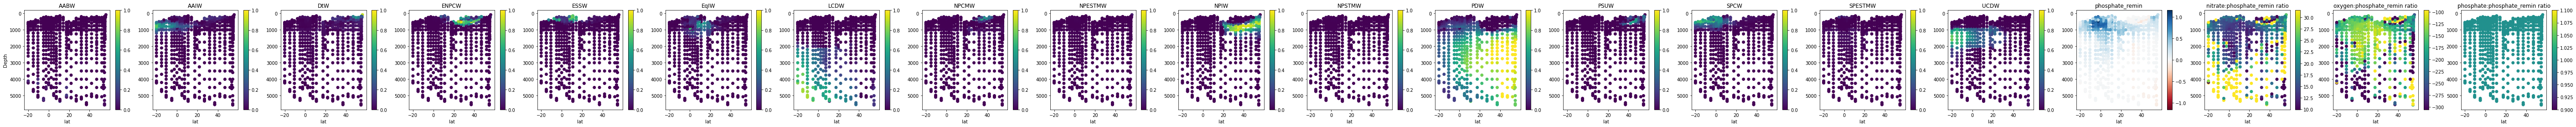

In [6]:
#plot the solution
pyompa.plot_ompasoln_endmember_fractions(ompa_soln=base_soln,
                                  xaxis_colname="lat",
                                  yaxis_colname="Depth",
                                  group_endmembers=True)

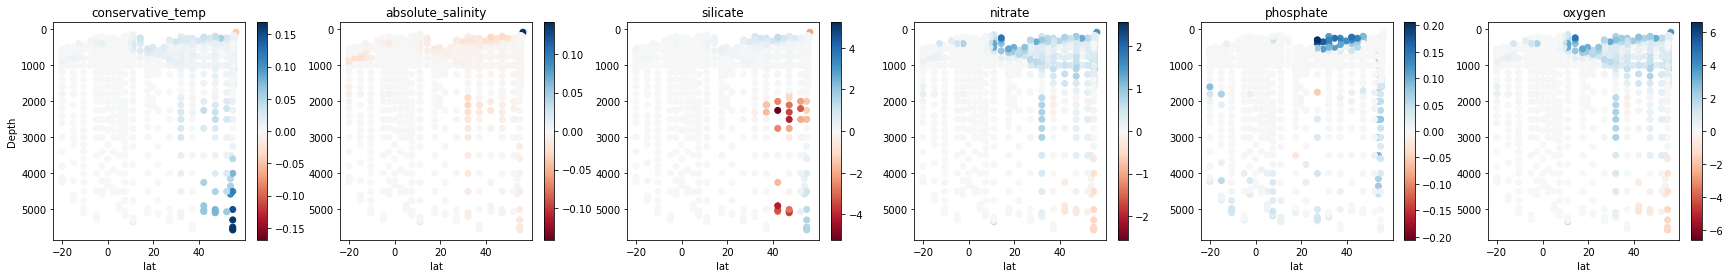

In [7]:
#plot the residuals
pyompa.plot_ompasoln_residuals(ompa_soln=base_soln,
                                  xaxis_colname="lat",
                                  yaxis_colname="Depth")